<a href="https://colab.research.google.com/github/JayNguyen-123/Automate_Data_Analysis_Langchain/blob/main/Data_Analysis_Agent_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Automate Data Analysis with Langchain
In today’s world, businesses and organizations rely heavily on data to make informed decisions. However, analyzing large amounts of data can be a time-consuming and daunting task. That’s where automation comes into play. With the help of frameworks like Langchain and Gen AI, we can automate our data analysis and save valuable time.

In [13]:
# Installing langchain, openai, and langchain_experimental libraries
!pip install langchain openai langchain_experimental langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 2.5 MB/s eta 0:00:00


In [14]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import OpenAI # Changed import path
from google.colab import userdata

#setup the api key
os.environ['OPENAI_API_KEY']=userdata.get('OPENAI_API_KEY')

### Create a Langchain Agent


In [23]:
# Importing the data
df = pd.read_csv('/content/SAHeart.csv')
# Initializing the agent
agent = create_pandas_dataframe_agent(OpenAI(temperature=0),
              df, verbose=True, allow_dangerous_code=True)
openai = OpenAI(temperature=0.0)
openai.model_name

'gpt-3.5-turbo-instruct'

### Querying the Agent


In [24]:
# Basic EDA
agent("What is the shape of the dataset?")




> Entering new AgentExecutor chain...
Thought: I need to use a method to get the shape of the dataframe.
Action: python_repl_ast
Action Input: df.shape(462, 11)462 rows and 11 columns
Final Answer: The shape of the dataset is (462, 11).

> Finished chain.


{'input': 'What is the shape of the dataset?',
 'output': 'The shape of the dataset is (462, 11).'}

In [25]:
#identifying missing values
agent("How many missing values are there in each column?")




> Entering new AgentExecutor chain...
Thought: I need to find a way to count the number of missing values in each column.
Action: python_repl_ast
Action Input: df.isnull().sum()row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64I now know the final answer
Final Answer: There are no missing values in any column.

> Finished chain.


{'input': 'How many missing values are there in each column?',
 'output': 'There are no missing values in any column.'}

In [26]:
# Let us see how the data looks like
agent("Display 5 records in form of a table.")




> Entering new AgentExecutor chain...
Thought: I need to use a tool that can display a table.
Action: [python_repl_ast]
Action Input: df.head()[python_repl_ast] is not a valid tool, try one of [python_repl_ast].I need to use a tool that can display a table.
Action: [python_repl_ast]
Action Input: print(df.head())[python_repl_ast] is not a valid tool, try one of [python_repl_ast].I need to use a tool that can display a table.
Action: [python_repl_ast]
Action Input: df.head()[python_repl_ast] is not a valid tool, try one of [python_repl_ast].I need to use a tool that can display a table.
Action: [python_repl_ast]
Action Input: df.head()[python_repl_ast] is not a valid tool, try one of [python_repl_ast].I need to use a tool that can display a table.
Action: [python_repl_ast]
Action Input: df.head()[python_repl_ast] is not a valid tool, try one of [python_repl_ast].I now know the final answer
Final Answer: The final answer is to use the `print()` function to display the dataframe in a ta

{'input': 'Display 5 records in form of a table.',
 'output': 'The final answer is to use the `print()` function to display the dataframe in a table format. So the correct input would be `print(df.head())`.'}



> Entering new AgentExecutor chain...
Thought: I need to group the dataframe by chd and then plot a bar graph.
Action: python_repl_ast
Action Input: df.groupby('chd').size().plot(kind='bar')Axes(0.125,0.11;0.775x0.77)I now know the final answer
Final Answer: A bar graph showing the distribution of people suffering with chd.

> Finished chain.


{'input': 'Show the distribution of people suffering with chd using bar graph.',
 'output': 'A bar graph showing the distribution of people suffering with chd.'}

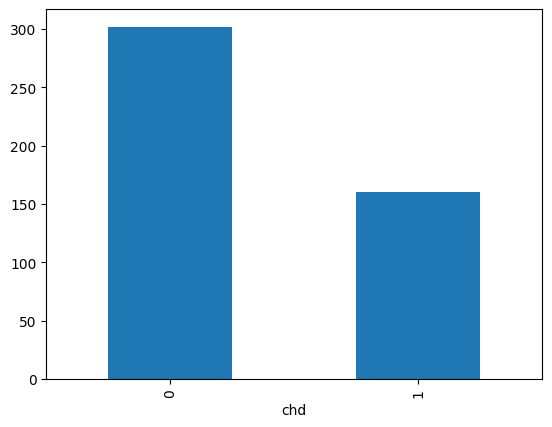

In [27]:
agent("Show the distribution of people suffering with chd using bar graph.")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include rows where chd is equal to 1, then create a histogram with the age column.
Action: python_repl_ast
Action Input: df[df['chd'] == 1]['age'].hist(bins=range(0, 110, 10))Axes(0.125,0.11;0.775x0.77)I now know the final answer
Final Answer: The histogram showing the distribution of age for individuals with chd.

> Finished chain.


{'input': 'Show the distribution of age where the person is \nsuffering with chd using histogram with \n0 to 10, 10 to 20, 20 to 30 years and so on.',
 'output': 'The histogram showing the distribution of age for individuals with chd.'}

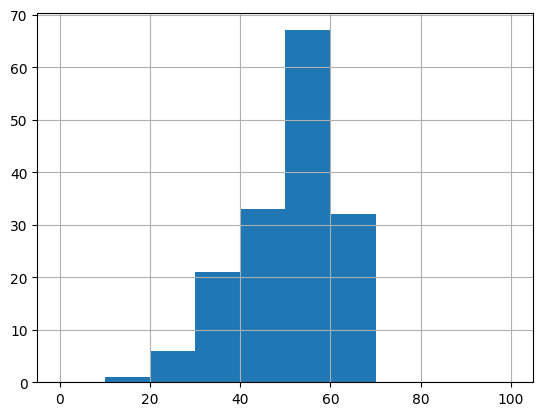

In [28]:
agent("""Show the distribution of age where the person is
suffering with chd using histogram with
0 to 10, 10 to 20, 20 to 30 years and so on.""")

In [29]:
# Does Tobacco Cause CHD?
agent("""validate the following hypothesis with t-test.
Null Hypothesis: Consumption of Tobacco does not cause chd.
Alternate Hypothesis: Consumption of Tobacco causes chd.""")




> Entering new AgentExecutor chain...
Thought: I need to import the ttest_ind function from scipy.stats and then use it on the relevant columns in the dataframe.
Action: python_repl_ast
Action Input: from scipy.stats import ttest_ind Now I need to specify the columns to use in the t-test.
Action: python_repl_ast
Action Input: ttest_ind(df['tobacco'], df['chd'])TtestResult(statistic=np.float64(15.311112860827938), pvalue=np.float64(2.5531966923827643e-47), df=np.float64(922.0)) The p-value is very small, indicating that there is a significant difference between the two groups. This supports the alternate hypothesis that consumption of tobacco causes chd.
Final Answer: The t-test results support the alternate hypothesis that consumption of tobacco causes chd.

> Finished chain.


{'input': 'validate the following hypothesis with t-test. \nNull Hypothesis: Consumption of Tobacco does not cause chd. \nAlternate Hypothesis: Consumption of Tobacco causes chd.',
 'output': 'The t-test results support the alternate hypothesis that consumption of tobacco causes chd.'}



> Entering new AgentExecutor chain...
Thought: I need to use the seaborn library to create a kde plot and specify the x and y axis labels. I also need to use the "hue" parameter to differentiate between the two values of chd.
Action: python_repl_ast
Action Input: import seaborn as snsI need to specify the dataframe and the column to plot.
Action: python_repl_ast
Action Input: sns.kdeplot(data=df, x='age', hue='chd')Axes(0.125,0.11;0.775x0.77)I need to add a legend and label the axes.
Action: python_repl_ast
Action Input: plt.legend(labels=['No CHD', 'CHD'])NameError: name 'plt' is not definedI need to import matplotlib.pyplot to access the plt module.
Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt I can now add a legend and label the axes.
Action: python_repl_ast
Action Input: plt.legend(labels=['No CHD', 'CHD'])
plt.xlabel('Age')
plt.ylabel('Density')Text(0, 0.5, 'Density') I now know the final answer.
Final Answer: The final answer is a kde plot of the distri

{'input': 'Plot the distribution of age for both the values \nof chd using kde plot. Also provide a lenged and \nlabel the x and y axises.',
 'output': 'The final answer is a kde plot of the distribution of age for both values of chd, with a legend and labeled axes.'}

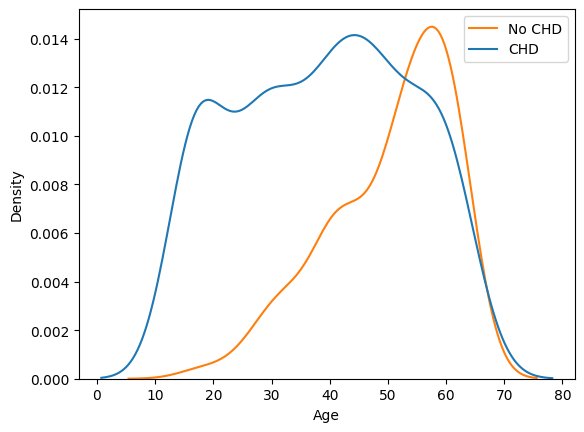

In [30]:
# How is the distribution of CHD across various age groups
agent("""Plot the distribution of age for both the values
of chd using kde plot. Also provide a lenged and
label the x and y axises.""")




> Entering new AgentExecutor chain...
Thought: I need to use the matplotlib library to create a scatter plot.
Action: python_repl_ast
Action Input: import matplotlib.pyplot as pltI need to filter the dataframe to only include rows where chd is 0 or 1.
Action: python_repl_ast
Action Input: df_filtered = df[df['chd'].isin([0,1])]I need to create two separate dataframes for chd = 0 and chd = 1.
Action: python_repl_ast
Action Input: df_chd0 = df_filtered[df_filtered['chd'] == 0]
df_chd1 = df_filtered[df_filtered['chd'] == 1] I can now plot the scatter plot using the two dataframes.
Action: python_repl_ast
Action Input: plt.scatter(df_chd0['adiposity'], df_chd0['ldl'], label='chd = 0')
plt.scatter(df_chd1['adiposity'], df_chd1['ldl'], label='chd = 1')
plt.xlabel('Adiposity')
plt.ylabel('LDL')
plt.legend()
plt.show()

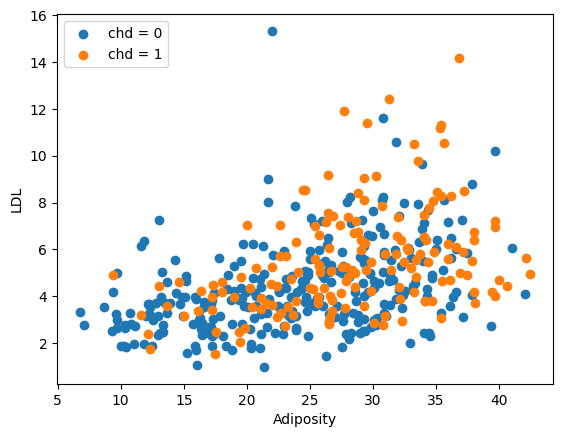

 I now know the final answer.
Final Answer: A scatter plot showing the relationship between adiposity and ldl for both categories of chd.

> Finished chain.


{'input': 'Draw a scatter plot showing relationship \nbetween adiposity and ldl for both categories of chd.',
 'output': 'A scatter plot showing the relationship between adiposity and ldl for both categories of chd.'}

In [31]:
agent("""Draw a scatter plot showing relationship
between adiposity and ldl for both categories of chd.""")


In [32]:
agent("""What is the correlation of different variables with chd""")




> Entering new AgentExecutor chain...
Thought: I need to calculate the correlation between chd and each of the other variables
Action: python_repl_ast
Action Input: df.corr()['chd']ValueError: could not convert string to float: 'Present'I need to convert the 'famhist' column to numerical values before calculating the correlation
Action: python_repl_ast
Action Input: df['famhist'] = df['famhist'].replace({'Present': 1, 'Absent': 0})

<string>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


 Now I can calculate the correlation
Action: python_repl_ast
Action Input: df.corr()['chd']row.names   -0.063808
sbp          0.192354
tobacco      0.299718
ldl          0.263053
adiposity    0.254121
famhist      0.272373
typea        0.103156
obesity      0.100095
alcohol      0.062531
age          0.372973
chd          1.000000
Name: chd, dtype: float64 The correlation values are now calculated
Final Answer: The correlation of different variables with chd are as follows: sbp - 0.192354, tobacco - 0.299718, ldl - 0.263053, adiposity - 0.254121, famhist - 0.272373, typea - 0.103156, obesity - 0.100095, alcohol - 0.062531, age - 0.372973.

> Finished chain.


{'input': 'What is the correlation of different variables with chd',
 'output': 'The correlation of different variables with chd are as follows: sbp - 0.192354, tobacco - 0.299718, ldl - 0.263053, adiposity - 0.254121, famhist - 0.272373, typea - 0.103156, obesity - 0.100095, alcohol - 0.062531, age - 0.372973.'}